<a href="https://colab.research.google.com/github/cyan9212/Dacon_Bicycle/blob/main/bicycle_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
from google.colab import files

# 1. 데이터 로드

In [9]:
uploaded = files.upload()

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()
train.describe()
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB


결측값이 존재하지 않음

# 2. EDA & FE

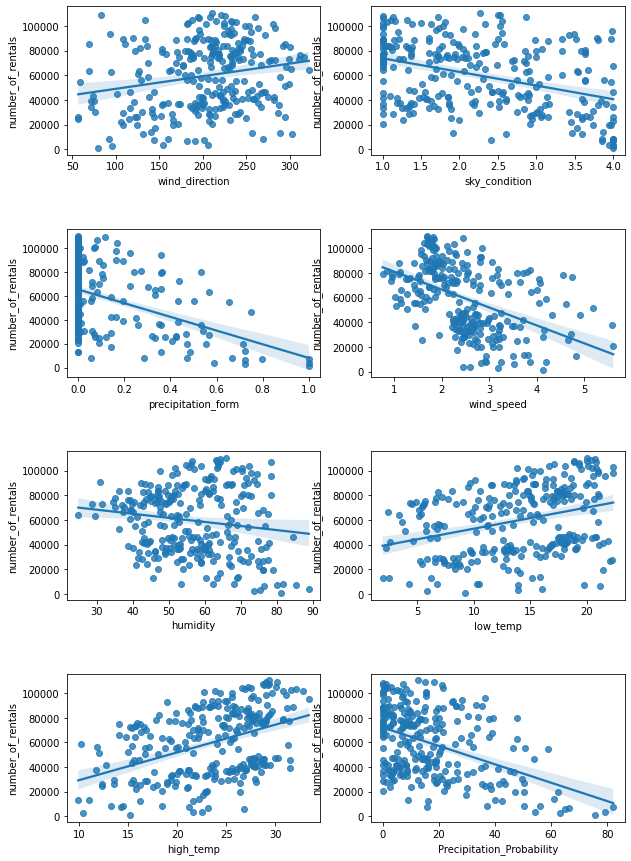

In [58]:
col=2; row=4
column_list = list(train.columns)
column_list = column_list[1:9]

fig, ax = plt.subplots(row, col,figsize=(10,15))
fig.subplots_adjust(hspace=0.5)
for r in range(row):
  for c in range(col):
    i = r*col+c
    if i  <= 8:
      sns.regplot(train[column_list[i]], train['number_of_rentals'], ax = ax[r][c])

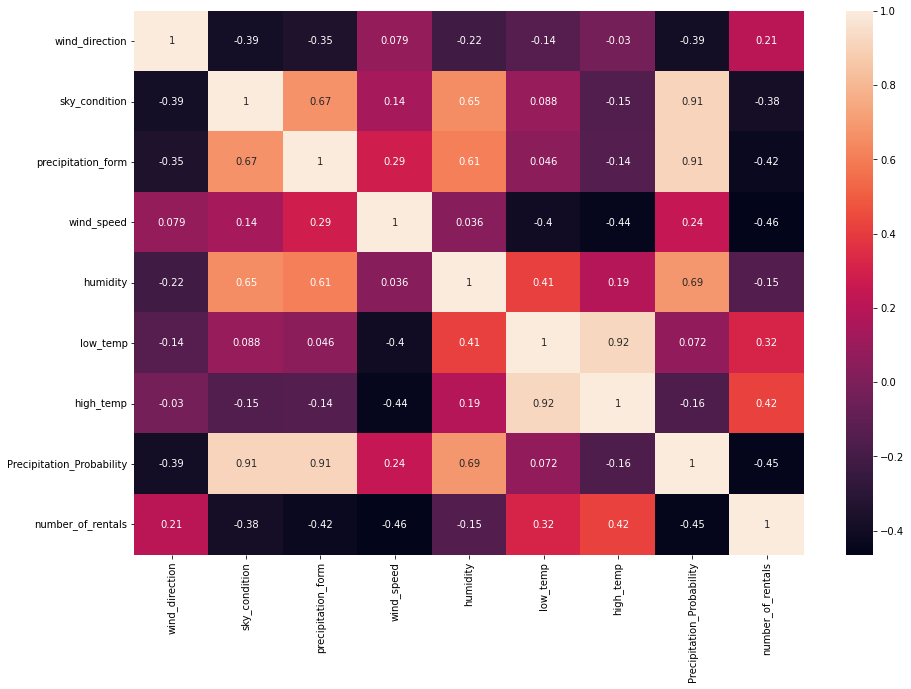

In [49]:
# 상관관계 확인을 위해 heatmap 사용
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True)

In [50]:
#상관관계가 0.3 이상인 피처들을 추출
cor = train.corr()
cor_fe = cor.index[abs(cor['number_of_rentals']) >=0.3]
cor_fe

Index(['sky_condition', 'precipitation_form', 'wind_speed', 'low_temp',
       'high_temp', 'Precipitation_Probability', 'number_of_rentals'],
      dtype='object')

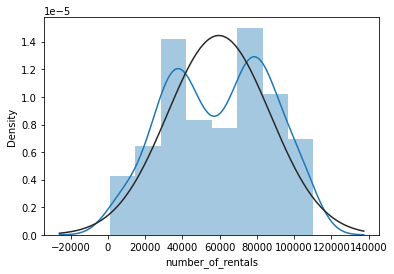

In [61]:
#타겟변수 확인
from scipy import stats
from scipy.stats import norm

sns.distplot(train['number_of_rentals'], fit=norm)